In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
MODEL_PATH = "artifacts/grad_boost_best.pkl"

with open(MODEL_PATH, "rb") as f:
    model = pickle.load(f)

print("Model loaded:", type(model))


Model loaded: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


In [3]:
DATA_PATH = "data/flights_cleaned.npz"

data = np.load(DATA_PATH)
X = data["X"]
y = data["y"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (271888, 28)
y shape: (271888,)


In [4]:
np.random.seed(42)

sample_size = 2000  # keep it small for quick visual check
idx = np.random.choice(len(X), size=sample_size, replace=False)

X_test_sample = X[idx]
y_test_sample = y[idx]

print("Sample shape:", X_test_sample.shape)


Sample shape: (2000, 28)


In [5]:
y_pred = model.predict(X_test_sample)


In [6]:
y_pred

array([ 481.1753672 , 1123.80246812, 1174.71995536, ...,  301.60867085,
        986.99741377,  545.75461942])

In [7]:
y_test_sample

array([ 481.42, 1124.11, 1174.97, ...,  301.61,  987.07,  545.95])

In [8]:
rmse = mean_squared_error(y_test_sample, y_pred, squared=False)
mae = mean_absolute_error(y_test_sample, y_pred)
r2 = r2_score(y_test_sample, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R2  : {r2:.4f}")


RMSE: 0.2187
MAE : 0.1477
R2  : 1.0000


In [9]:
results_df = pd.DataFrame({
    "actual_price": y_test_sample,
    "predicted_price": y_pred,
    "error": y_test_sample - y_pred
})

results_df.head(10)


,actual_price,predicted_price,error
0,481.42,481.175367,0.244633
1,1124.11,1123.802468,0.307532
2,1174.97,1174.719955,0.250045
3,898.67,898.764652,-0.094652
4,959.91,959.766399,0.143601
5,1367.60,1367.516495,0.083505
6,762.89,762.960417,-0.070417
7,1569.65,1569.623968,0.026032
8,835.21,835.884519,-0.674519
9,674.52,674.414715,0.105285


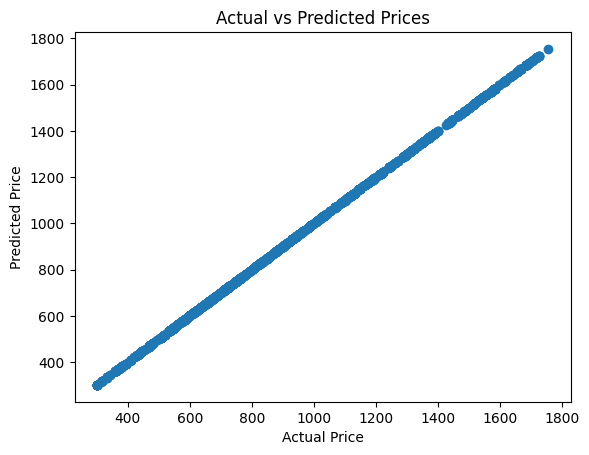

In [10]:
plt.figure()
plt.scatter(y_test_sample, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


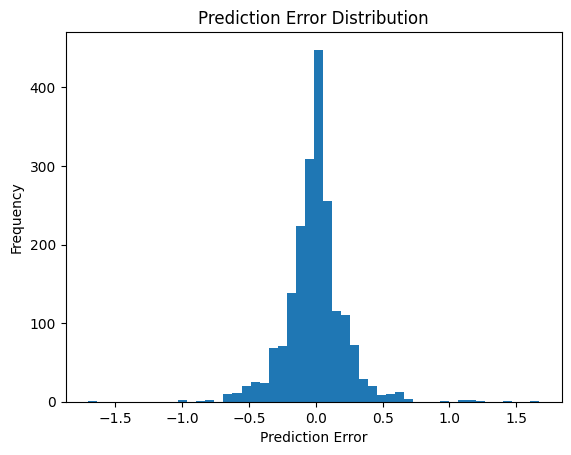

In [11]:
plt.figure()
plt.hist(y_test_sample - y_pred, bins=50)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Prediction Error Distribution")
plt.show()


In [ ]:
# Worst predictions (sanity check)

results_df["abs_error"] = np.abs(results_df["error"])
results_df.sort_values("abs_error", ascending=False).head(10)


,actual_price,predicted_price,error,abs_error
725,647.90,649.602878,-1.702878,1.702878
171,721.20,719.529522,1.670478,1.670478
557,647.90,646.461086,1.438914,1.438914
1512,654.88,653.664743,1.215257,1.215257
1075,722.74,721.566463,1.173537,1.173537
1918,722.74,721.608356,1.131644,1.131644
483,1098.93,1097.825982,1.104018,1.104018
678,722.74,721.656056,1.083944,1.083944
1168,1091.21,1092.198399,-0.988399,0.988399
1158,721.20,722.186651,-0.986651,0.986651
